*************************************************************************
# Table of Contents
1. [Introduction](#intro)

2. [Load the Data and Libraries](#load)

3. [Carry out exploratory data analysis (EDA)](#eda)
    * [Missing features, means and stdv](#missing)
    * [Churned and not Churned](#churn_means)
    * [Features Distributions and Histograms](#histograms)
        * [Churned Distributions](#churn_plots)
        * [Not Churned Distributions(those who stayed)](#not_churned_plots)
        * [A Clearer Comparison between features](#clearer)
        
    * [Correlation Matrix](#corr)
       
    
4. [Build a model to predict user churn](#model)
    * [Logistic Regression](#lg_regression)
    * [Random Forest](#rf)
    * [Metrics Evaluation](#metrics)
    
    
    
5. [Create user clusters](#clusters)
    * [Dendogram](#dendogram)
    * [k-Means Analysis](#k_means)
    
    
    
 6. [Conclussions and Recomendations](#conclusions)
     

<a id="intro"></a> 

# 1.Introduction

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.

One of the most common problems gyms and other services face is customer churn. How do we know if a customer is no longer with us? We can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.

In order to fight churn, Model Fitness has digitized a number of its customer profiles. Our task is to analyze them and come up with a customer retention strategy.

<a id="load"></a>

# 2. Load Libraries and Data

In [1]:
# for review
#!pip install sidetable --user

# Loading all the libraries
import pandas as pd
import numpy as np
import sidetable
import re
from string import digits

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go 
from datetime import datetime as dt
from plotly.subplots import make_subplots


import scipy.stats as st
import math as mth
np.warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

#pd.set_option('max_colwidth', 0)
#pd.set_option('display.chop_threshold', 1)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans

In [2]:
#seaborn settings
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,6)})

In [3]:
# Loading the data
try:
    gym = pd.read_csv('gym_churn_us.csv')
except :
    gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [4]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<a id="eda"></a>

#  3.Carry out exploratory data analysis (EDA)

<a id="missing"></a>

## Missing features, mean values and standard deviation

In [5]:
gym.columns= gym.columns.str.lower()

In [6]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [7]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [8]:
gym.churn.value_counts()

0    2939
1    1061
Name: churn, dtype: int64

<a id="churn_means"></a>

## Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

In [9]:
g_churn = gym.groupby('churn').mean()
g_churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<a id="histograms"></a>

## Feature distributions  and  Histograms and for those who left (churn) and those who stayed.

- Lets create a separate dataframe for each

In [10]:
left = gym[gym['churn']==1]
stayed = gym[gym['churn']==0]

In [11]:
left.shape
stayed.shape

(1061, 14)

(2939, 14)

In [12]:
features = gym.drop('churn',axis=1).columns
features    

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month'],
      dtype='object')

<a id="churn_plots"></a>

### Those who left (churn) 

Text(0.5, 1.0, 'CHURNED - gender')

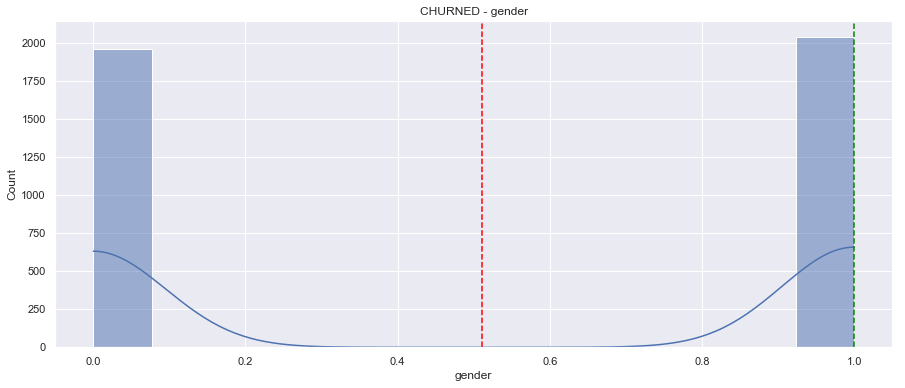

Text(0.5, 1.0, 'CHURNED - near_location')

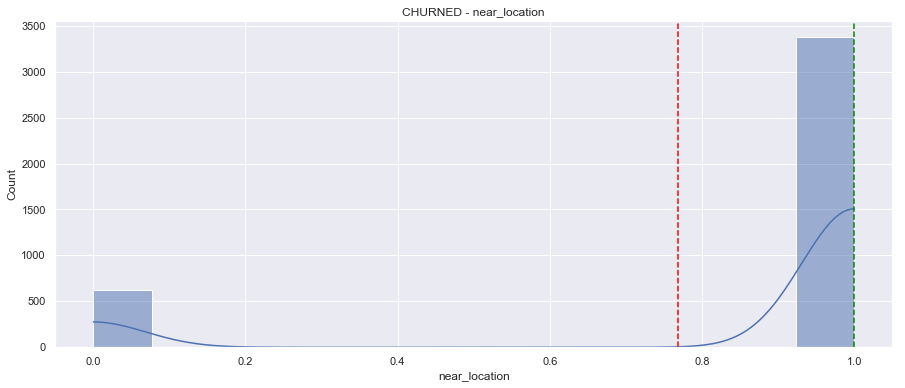

Text(0.5, 1.0, 'CHURNED - partner')

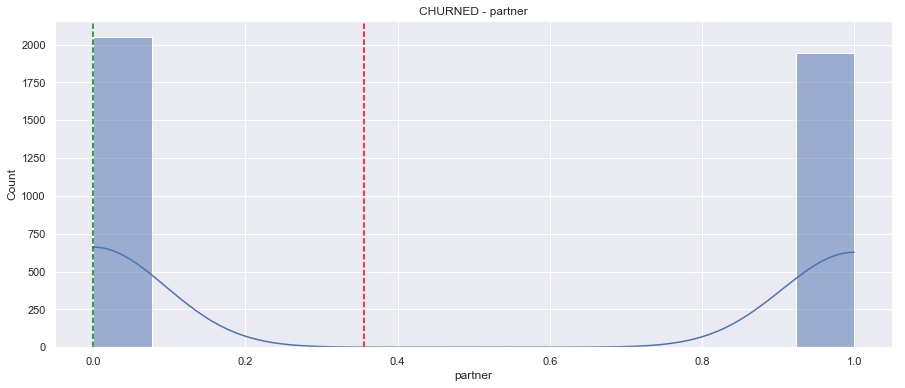

Text(0.5, 1.0, 'CHURNED - promo_friends')

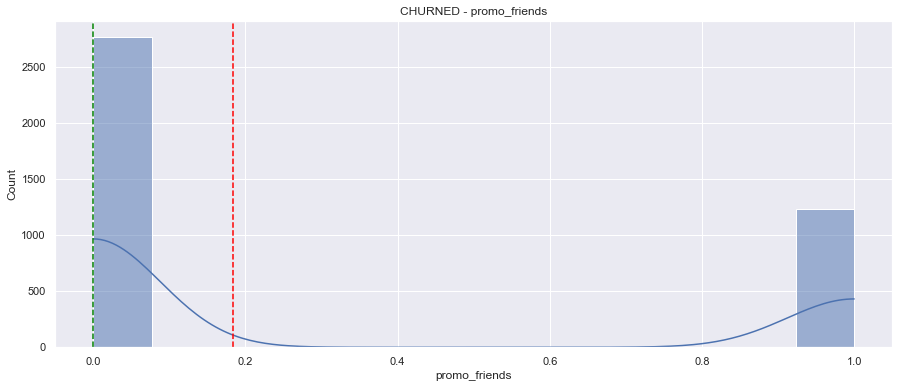

Text(0.5, 1.0, 'CHURNED - phone')

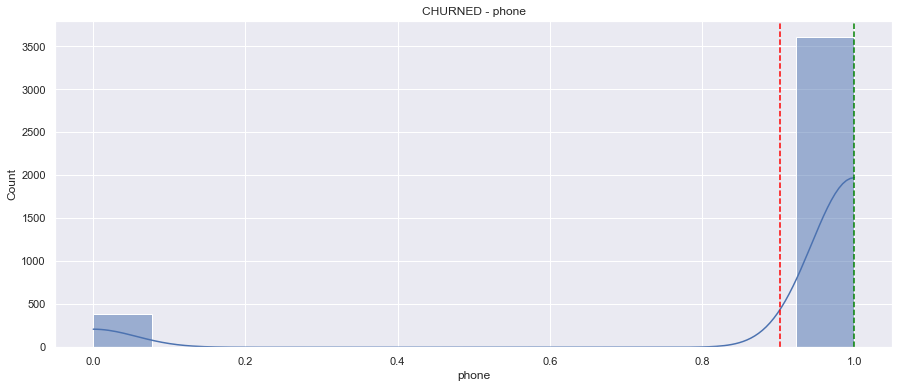

Text(0.5, 1.0, 'CHURNED - contract_period')

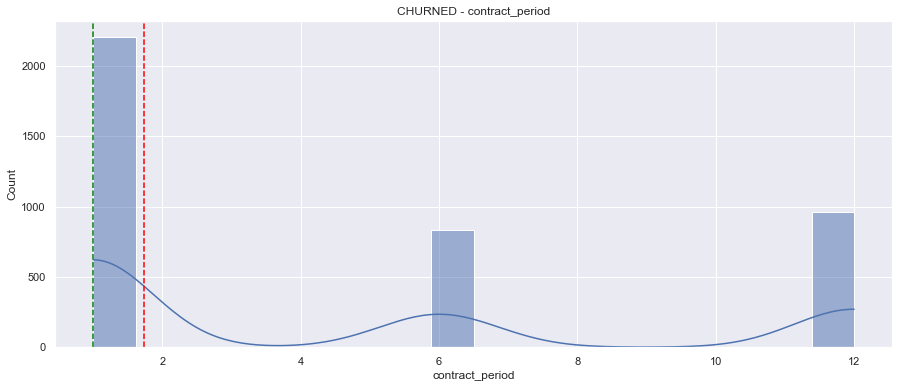

Text(0.5, 1.0, 'CHURNED - group_visits')

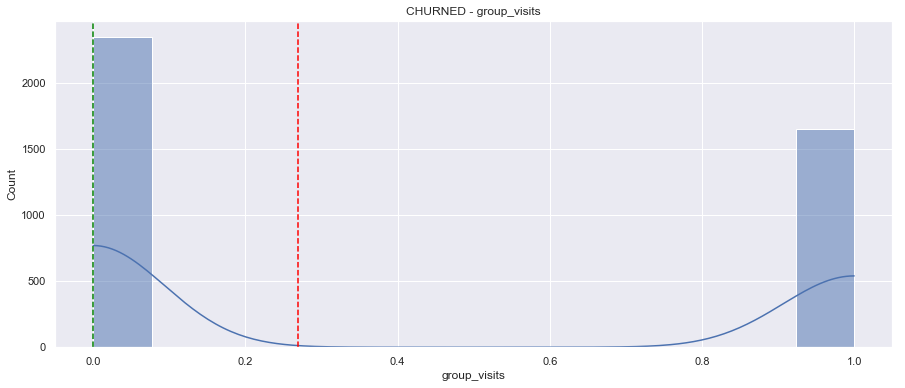

Text(0.5, 1.0, 'CHURNED - age')

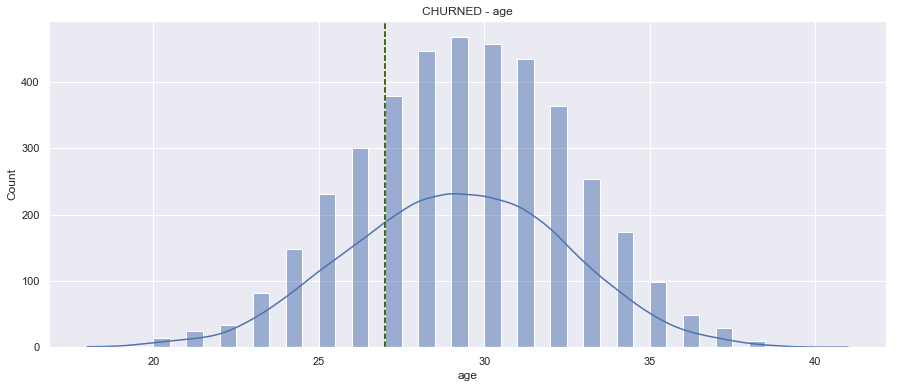

Text(0.5, 1.0, 'CHURNED - avg_additional_charges_total')

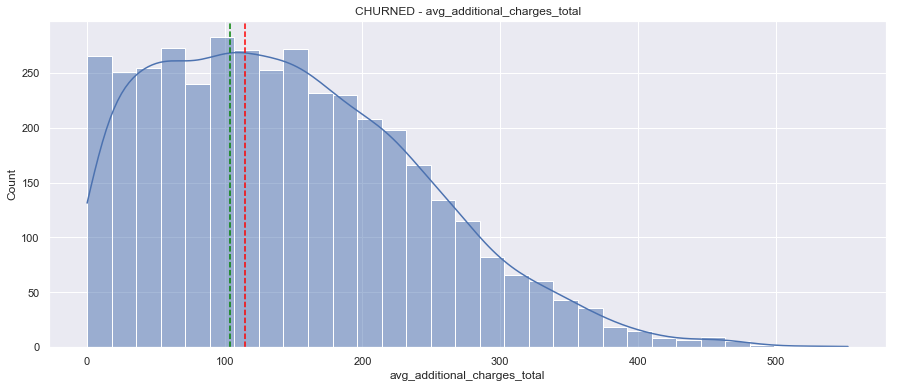

Text(0.5, 1.0, 'CHURNED - month_to_end_contract')

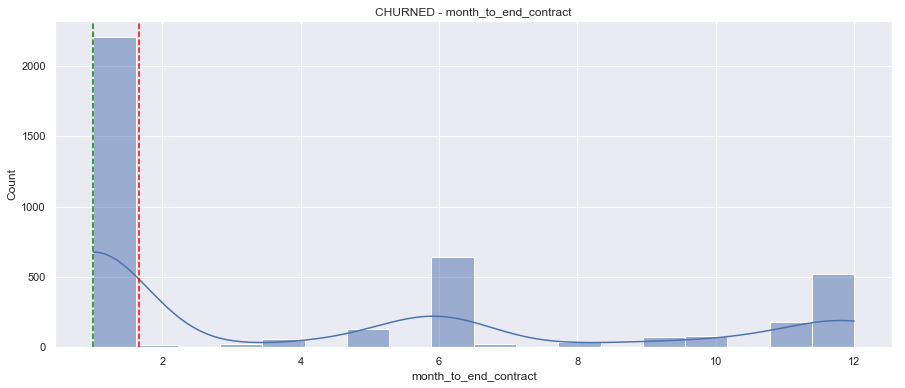

Text(0.5, 1.0, 'CHURNED - lifetime')

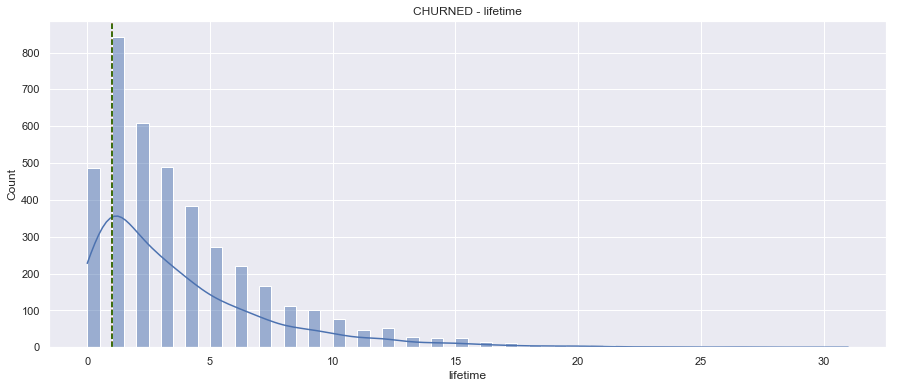

Text(0.5, 1.0, 'CHURNED - avg_class_frequency_total')

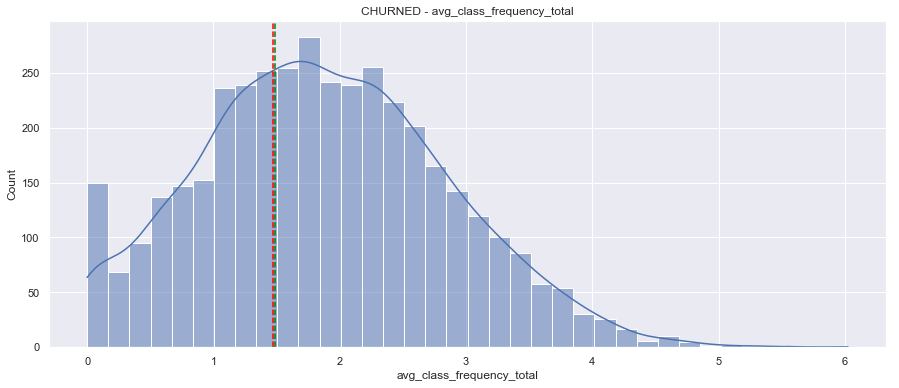

Text(0.5, 1.0, 'CHURNED - avg_class_frequency_current_month')

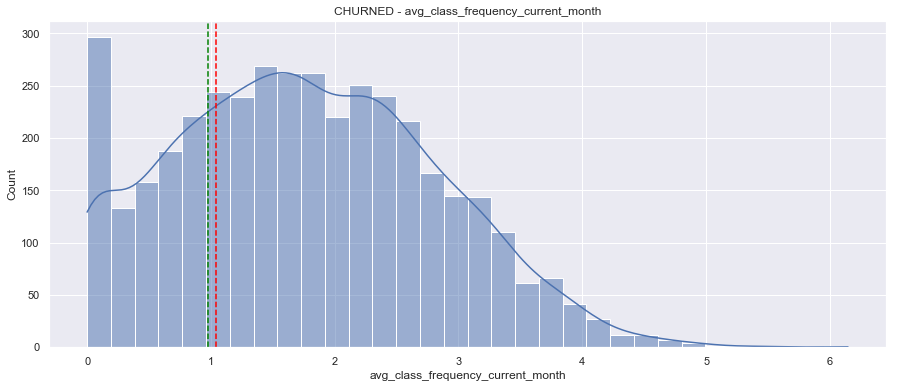

In [13]:
#left 
for f in features:
    #title = 'CHURNED ' + f
    sns.histplot(data=left,x=gym[f],kde=True).set_title('CHURNED - '+f)
    plt.axvline(left[f].mean(),color='red',linestyle='--');
    plt.axvline(left[f].median(),color='green',linestyle='--');
    plt.show();
    

<a id="not_churned_plots"></a>

### Those who STAYED (not churned)

Text(0.5, 1.0, 'Stayed - gender')

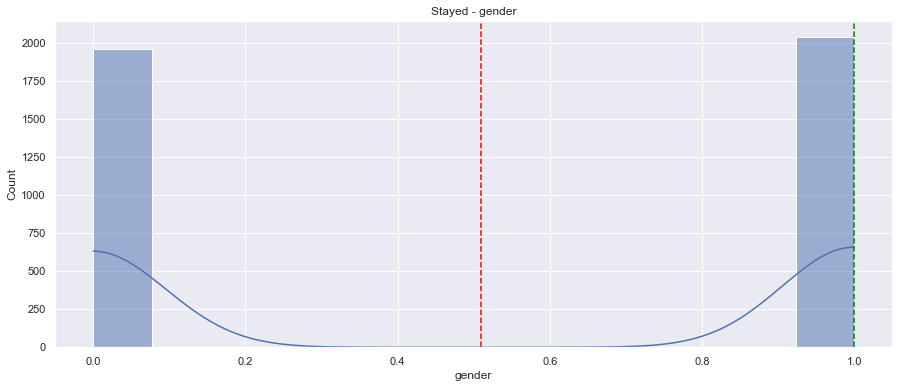

Text(0.5, 1.0, 'Stayed - near_location')

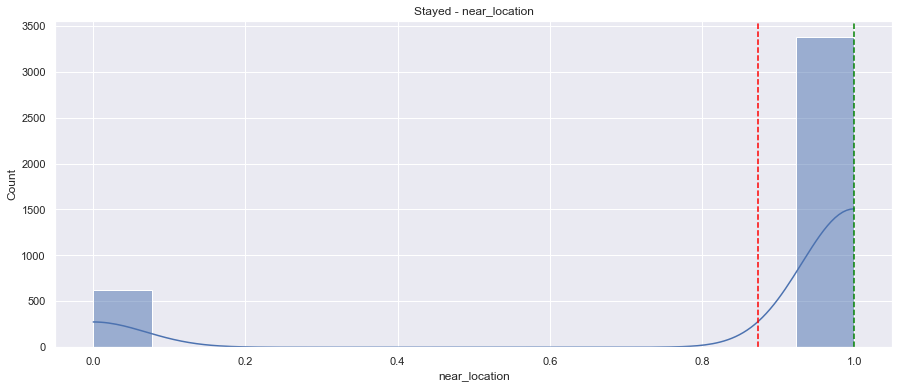

Text(0.5, 1.0, 'Stayed - partner')

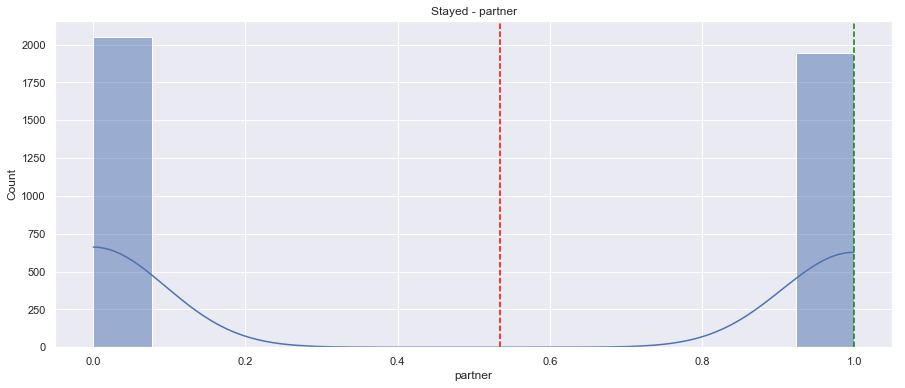

Text(0.5, 1.0, 'Stayed - promo_friends')

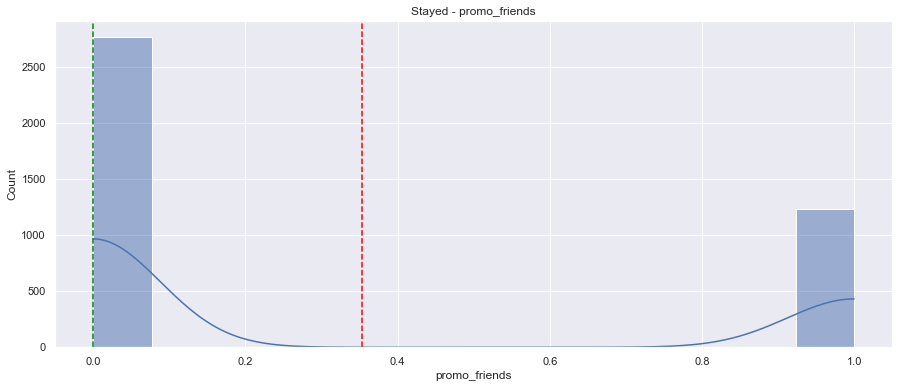

Text(0.5, 1.0, 'Stayed - phone')

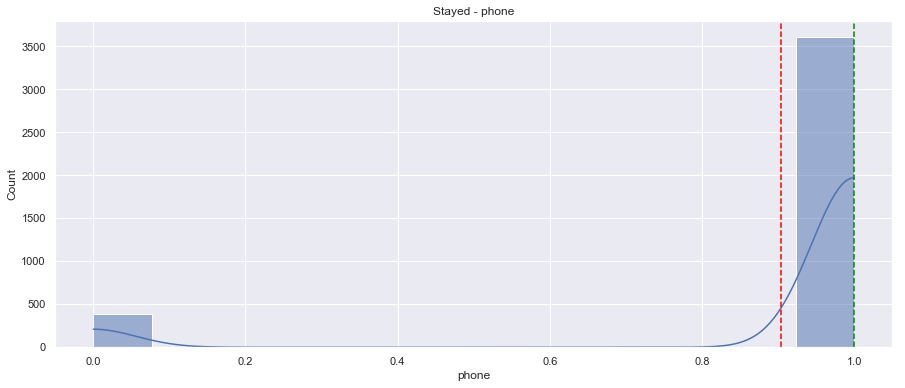

Text(0.5, 1.0, 'Stayed - contract_period')

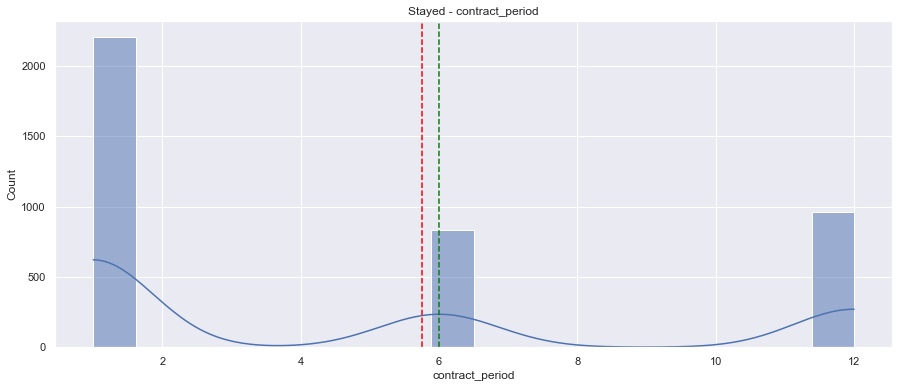

Text(0.5, 1.0, 'Stayed - group_visits')

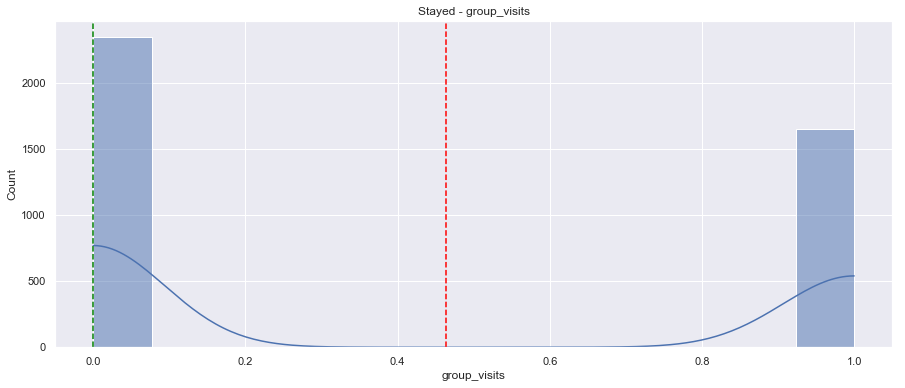

Text(0.5, 1.0, 'Stayed - age')

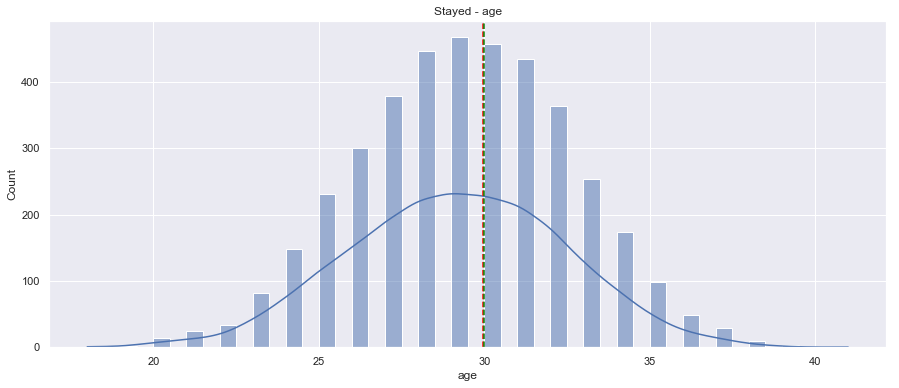

Text(0.5, 1.0, 'Stayed - avg_additional_charges_total')

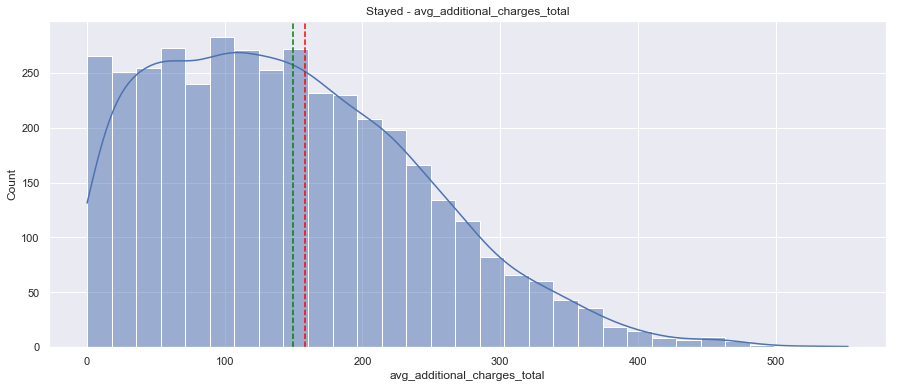

Text(0.5, 1.0, 'Stayed - month_to_end_contract')

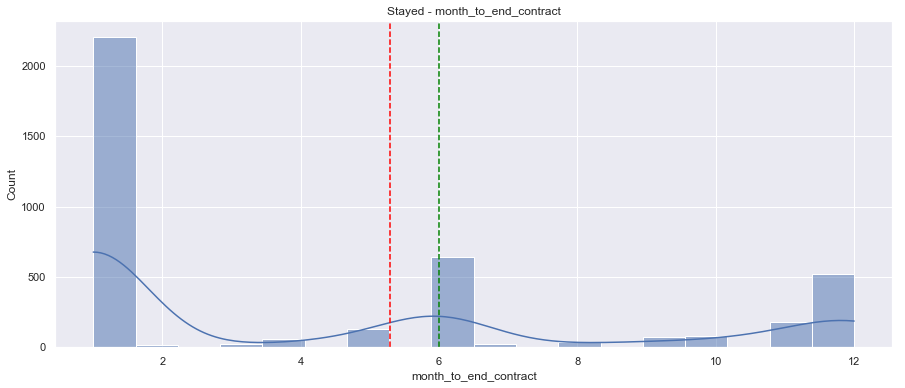

Text(0.5, 1.0, 'Stayed - lifetime')

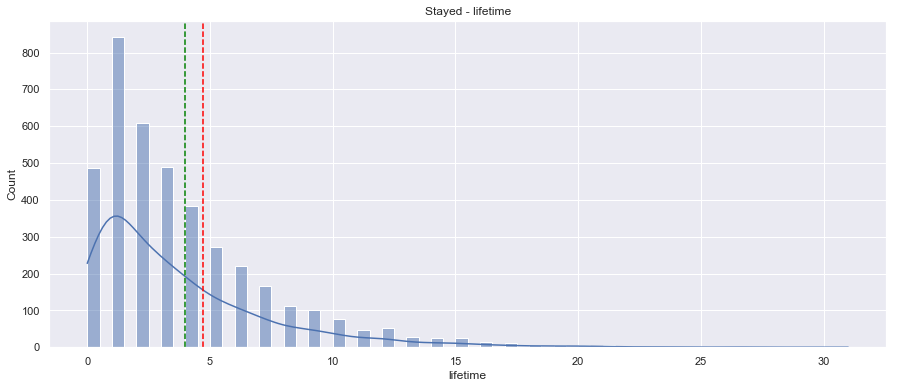

Text(0.5, 1.0, 'Stayed - avg_class_frequency_total')

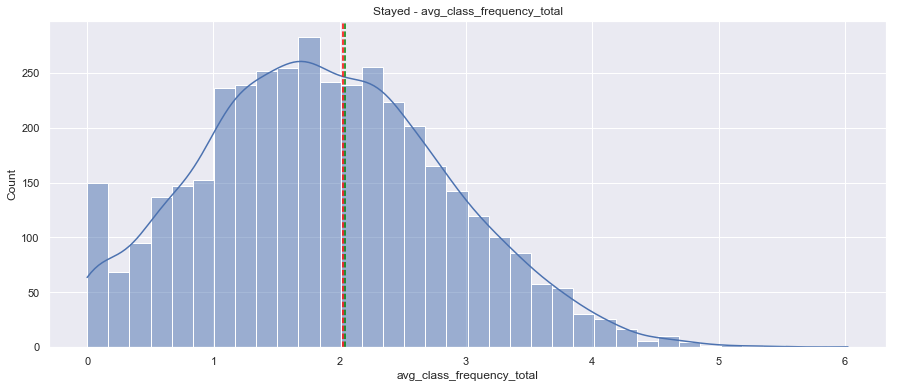

Text(0.5, 1.0, 'Stayed - avg_class_frequency_current_month')

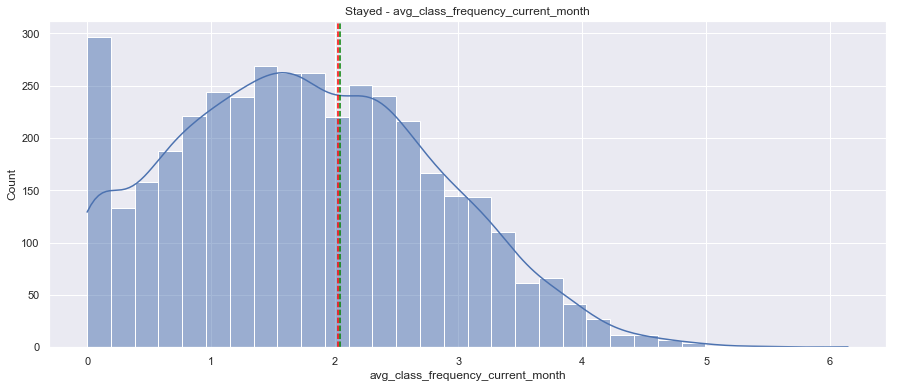

In [14]:
for f in features:
    #title = f
    sns.histplot(data=stayed,x=gym[f],kde=True).set_title('Stayed - '+f)
    plt.axvline(stayed[f].mean(),color='red',linestyle='--');
    plt.axvline(stayed[f].median(),color='green',linestyle='--');
    plt.show();

In [15]:
#sns.pairplot(gym)
gym.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

<a id="clearer"></a>

###  Lets visualize a clearer comparison (by feature)  between those who left and stayed for each of main_features - those features that may give us the better insight on churned clients

In [16]:
main_features= ['age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']
main_features

['age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month']

#### 'age'

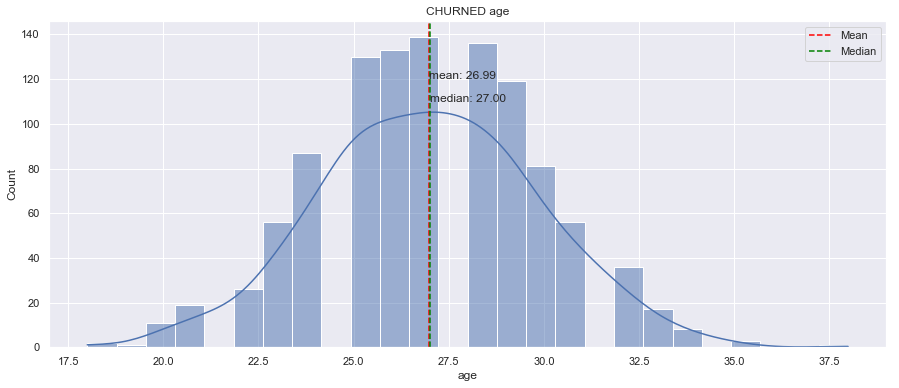

In [17]:
sns.histplot(data=left,x=left['age'],kde=True).set_title('CHURNED '+'age')

plt.axvline(left['age'].mean(),color='red',linestyle='--',label='Mean');
plt.text(x = left['age'].mean(),y = 120,s = 'mean: {:.2f}'.format(left['age'].mean())) 

plt.axvline(left['age'].median(),color='green',linestyle='--',label='Median');
plt.text(x = left['age'].median(),y = 110,s = 'median: {:.2f}'.format(left['age'].median()))

plt.legend()
plt.show();

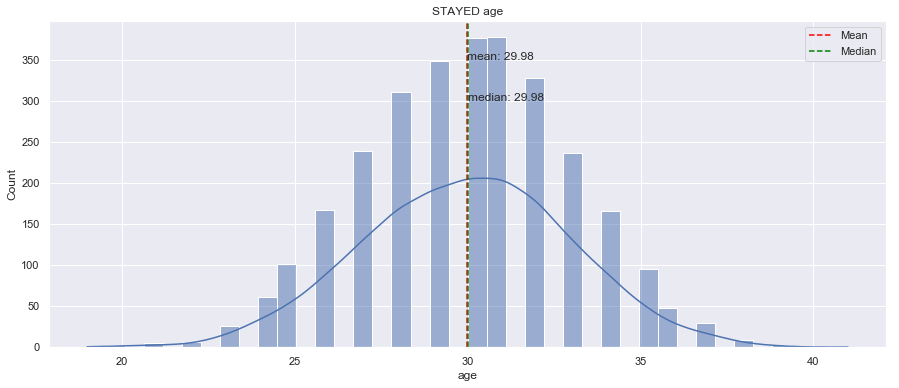

In [18]:
sns.histplot(data=stayed,x=stayed['age'],kde=True).set_title('STAYED '+'age')

plt.axvline(stayed['age'].mean(),color='red',linestyle='--',label='Mean');
plt.text(x = stayed['age'].mean(),y = 350,s = 'mean: {:.2f}'.format(stayed['age'].mean()))

plt.axvline(stayed['age'].median(),color='green',linestyle='--',label='Median');
plt.text(x = stayed['age'].median(),y = 300,s = 'median: {:.2f}'.format(stayed['age'].mean()))

plt.legend()
plt.show();

### *****Churned mean 'Age'  is lower*****

#### avg_additional_charges_total

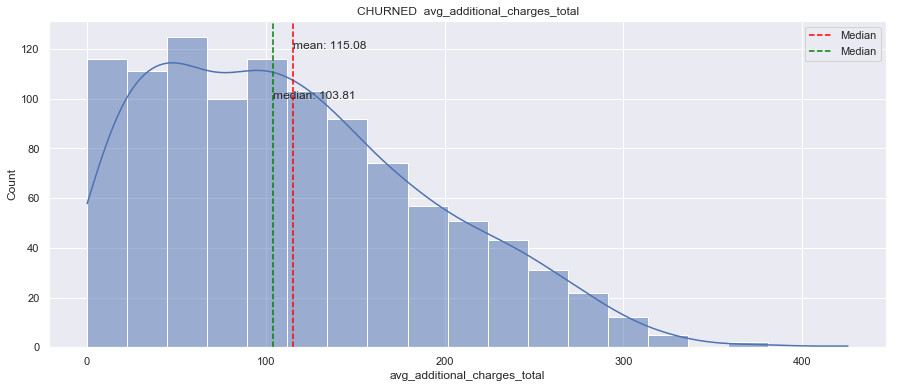

In [19]:
sns.histplot(data=left,x=left['avg_additional_charges_total'],kde=True).set_title('CHURNED  avg_additional_charges_total')

plt.axvline(left['avg_additional_charges_total'].mean(),color='red',linestyle='--',label='Median');
plt.text(x = left['avg_additional_charges_total'].mean(),y = 120,s = 'mean: {:.2f}'.format(left['avg_additional_charges_total'].mean()))

plt.axvline(left['avg_additional_charges_total'].median(),color='green',linestyle='--',label='Median');
plt.text(x = left['avg_additional_charges_total'].median(),y = 100,s = 'median: {:.2f}'.format(left['avg_additional_charges_total'].median()))

plt.legend();
plt.show();

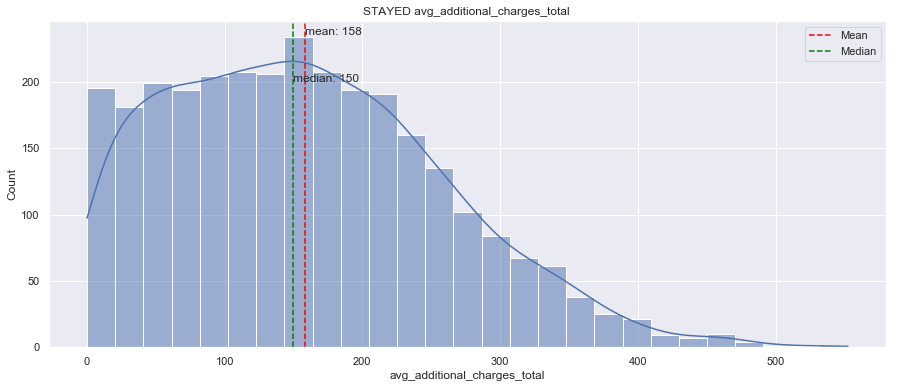

In [20]:
sns.histplot(data=stayed,x=stayed['avg_additional_charges_total'],kde=True).set_title('STAYED avg_additional_charges_total ')
plt.axvline(stayed['avg_additional_charges_total'].mean(),color='red',linestyle='--',label='Mean');

plt.text(x = stayed['avg_additional_charges_total'].mean(),y = 235,s = 'mean: {:.0f}'.format(stayed['avg_additional_charges_total'].mean()))

plt.axvline(stayed['avg_additional_charges_total'].median(),color='green',linestyle='--',label='Median');
plt.text(x = stayed['avg_additional_charges_total'].median(),y = 200,s = 'median: {:.0f}'.format(stayed['avg_additional_charges_total'].median()))

plt.legend()
plt.show();

### *****Churned mean 'avg_additional_charges_total'  is lower*****

#### month_to_end_contract

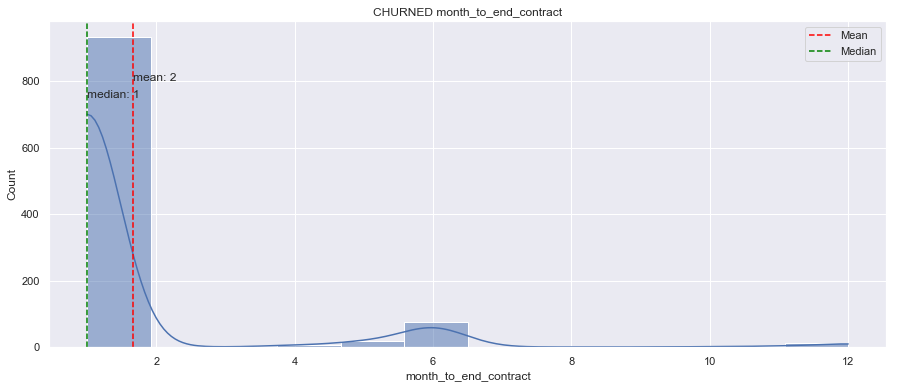

In [21]:
sns.histplot(data=left,x=left['month_to_end_contract'],kde=True).set_title('CHURNED month_to_end_contract')
plt.axvline(left['month_to_end_contract'].mean(),color='red',linestyle='--',label='Mean');
plt.text(x = left['month_to_end_contract'].mean(),y = 800,s = 'mean: {:.0f}'.format(left['month_to_end_contract'].mean()))

plt.axvline(left['month_to_end_contract'].median(),color='green',linestyle='--',label='Median');
plt.text(x = left['month_to_end_contract'].median(),y = 750,s = 'median: {:.0f}'.format(left['month_to_end_contract'].median()))


plt.legend()
plt.show();

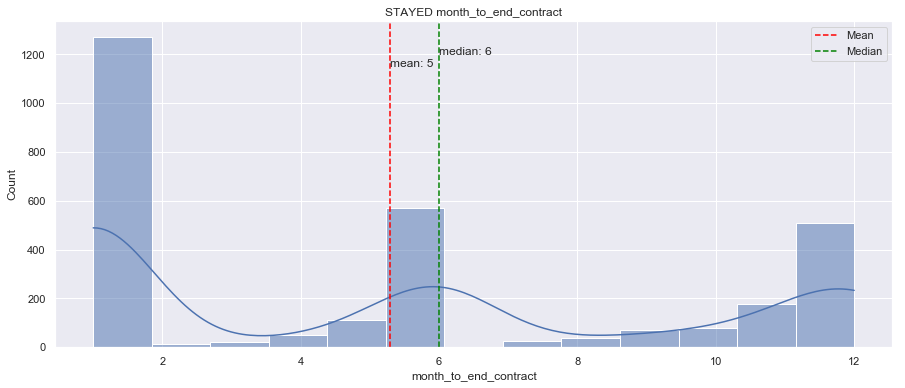

In [22]:
sns.histplot(data=stayed,x=stayed['month_to_end_contract'],kde=True).set_title('STAYED month_to_end_contract')


plt.axvline(stayed['month_to_end_contract'].mean(),color='red',linestyle='--',label='Mean');
plt.text(x = stayed['month_to_end_contract'].mean(),y = 1150,s = 'mean: {:.0f}'.format(stayed['month_to_end_contract'].mean()))


plt.axvline(stayed['month_to_end_contract'].median(),color='green',linestyle='--',label='Median');
plt.text(x = stayed['month_to_end_contract'].median(),y = 1200,s = 'median: {:.0f}'.format(stayed['month_to_end_contract'].median()))

plt.legend()
plt.show();

### *****Churned mean 'month_to_end_contract'  is much lower*****

#### lifetime

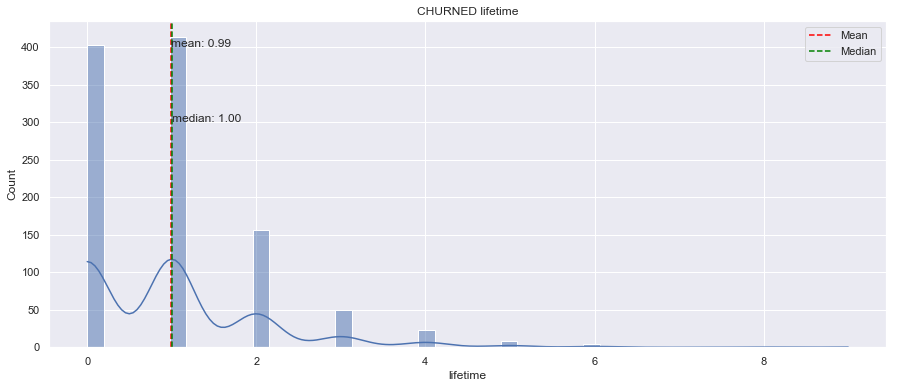

In [23]:
sns.histplot(data=left,x=left['lifetime'],kde=True).set_title('CHURNED lifetime')

plt.axvline(left['lifetime'].mean(),color='red',linestyle='--',label='Mean');
plt.text(x = left['lifetime'].mean(),y = 400,s = 'mean: {:.2f}'.format(left['lifetime'].mean()))


plt.axvline(left['lifetime'].median(),color='green',linestyle='--',label='Median');
plt.text(x = left['lifetime'].median(),y = 300,s = 'median: {:.2f}'.format(left['lifetime'].median()))


plt.legend()
plt.show();


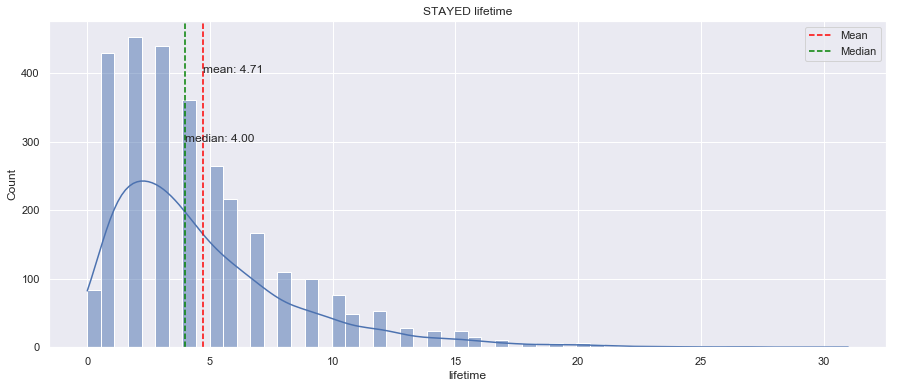

In [24]:
sns.histplot(data=stayed,x=stayed['lifetime'],kde=True).set_title('STAYED lifetime')

plt.axvline(stayed['lifetime'].mean(),color='red',linestyle='--',label='Mean');
plt.text(x = stayed['lifetime'].mean(),y = 400,s = 'mean: {:.2f}'.format(stayed['lifetime'].mean()))


plt.axvline(stayed['lifetime'].median(),color='green',linestyle='--',label='Median');
plt.text(x = stayed['lifetime'].median(),y = 300,s = 'median: {:.2f}'.format(stayed['lifetime'].median()))

plt.legend()
plt.show();

### *****Churned mean 'Lifetime'  is much lower*****

#### avg_class_frequency_total

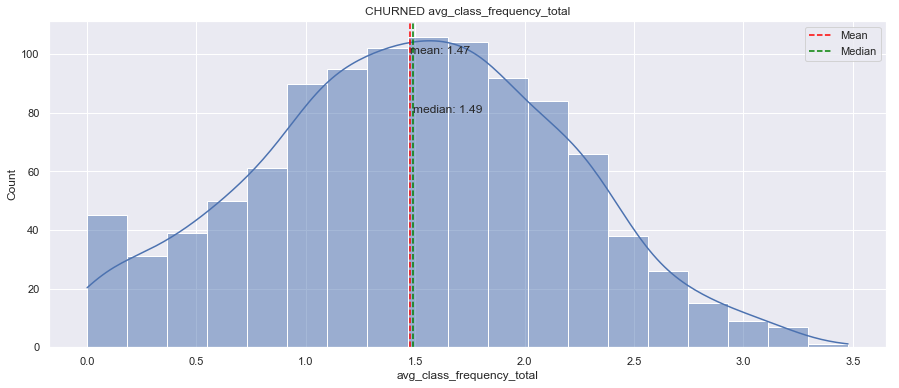

In [25]:
sns.histplot(data=left,x=left['avg_class_frequency_total'],kde=True).set_title('CHURNED avg_class_frequency_total')

plt.axvline(left['avg_class_frequency_total'].mean(),color='red',linestyle='--',label='Mean');
plt.text(x = left['avg_class_frequency_total'].mean(),y = 100,s = 'mean: {:.2f}'.format(left['avg_class_frequency_total'].mean()))

plt.axvline(left['avg_class_frequency_total'].median(),color='green',linestyle='--',label='Median');
plt.text(x = left['avg_class_frequency_total'].median(),y = 80,s = 'median: {:.2f}'.format(left['avg_class_frequency_total'].median()))


plt.legend()
plt.show();

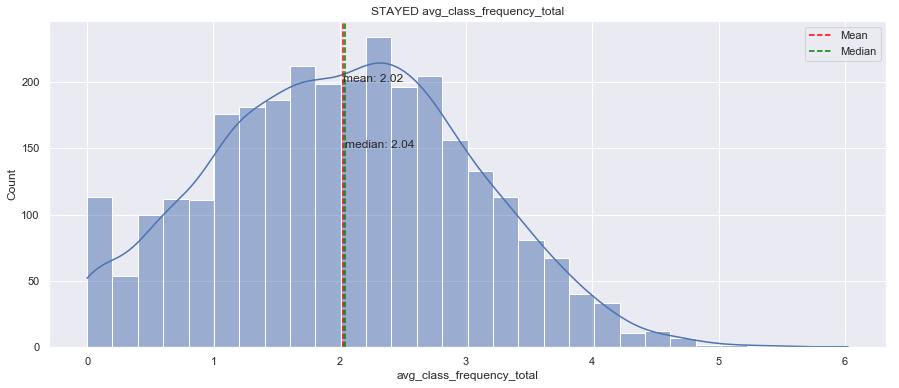

In [26]:
sns.histplot(data=stayed,x=stayed['avg_class_frequency_total'],kde=True).set_title('STAYED avg_class_frequency_total')


plt.axvline(stayed['avg_class_frequency_total'].mean(),color='red',linestyle='--',label='Mean');
plt.text(x = stayed['avg_class_frequency_total'].mean(),y = 200,s = 'mean: {:.2f}'.format(stayed['avg_class_frequency_total'].mean()))

plt.axvline(stayed['avg_class_frequency_total'].median(),color='green',linestyle='--',label='Median');
plt.text(x = stayed['avg_class_frequency_total'].median(),y = 150,s = 'median: {:.2f}'.format(stayed['avg_class_frequency_total'].median()))


plt.legend()
plt.show();

### *****Churned mean 'avg_class_frequency_total'  is lower*****

#### avg_class_frequency_current_month

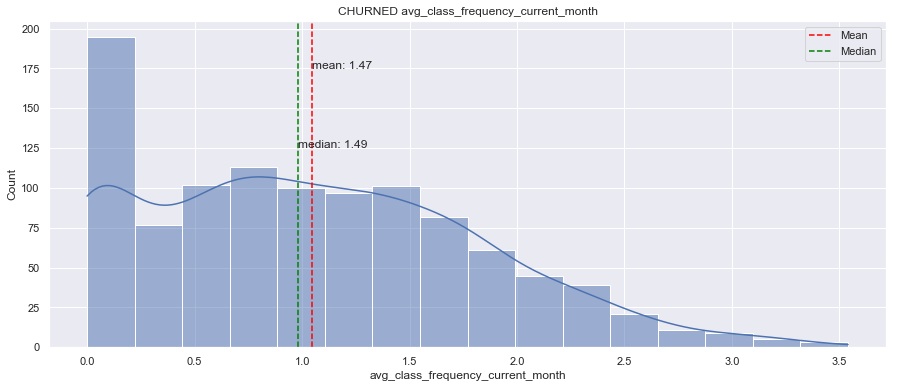

In [27]:
sns.histplot(data=left,x=left['avg_class_frequency_current_month'],kde=True).set_title('CHURNED avg_class_frequency_current_month')

plt.axvline(left['avg_class_frequency_current_month'].mean(),color='red',linestyle='--',label='Mean');
plt.text(x = left['avg_class_frequency_current_month'].mean(),y = 175,s = 'mean: {:.2f}'.format(left['avg_class_frequency_total'].mean()))

plt.axvline(left['avg_class_frequency_current_month'].median(),color='green',linestyle='--',label='Median');
plt.text(x = left['avg_class_frequency_current_month'].median(),y = 125,s = 'median: {:.2f}'.format(left['avg_class_frequency_total'].median()))
plt.legend()
plt.show();

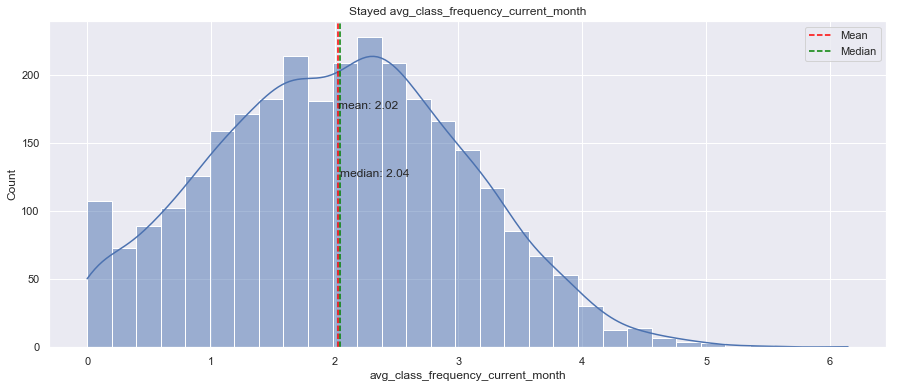

In [28]:
sns.histplot(data=stayed,x=stayed['avg_class_frequency_current_month'],kde=True).set_title('Stayed avg_class_frequency_current_month')


plt.axvline(stayed['avg_class_frequency_current_month'].mean(),color='red',linestyle='--',label='Mean');
plt.text(x = stayed['avg_class_frequency_current_month'].mean(),y = 175,s = 'mean: {:.2f}'.format(stayed['avg_class_frequency_total'].mean()))

plt.axvline(stayed['avg_class_frequency_current_month'].median(),color='green',linestyle='--',label='Median');
plt.text(x = stayed['avg_class_frequency_current_month'].median(),y = 125,s = 'median: {:.2f}'.format(stayed['avg_class_frequency_total'].median()))
plt.legend()
plt.show();

### *****Churned mean 'avg_class_frequency_current_month  is lower*****

### Note : we can start see a pattern just from reading the features on 'churned' and 'stayed'  , 'churned' features means tend to be lower.

<a id="corr"></a>

## Correlation matrix

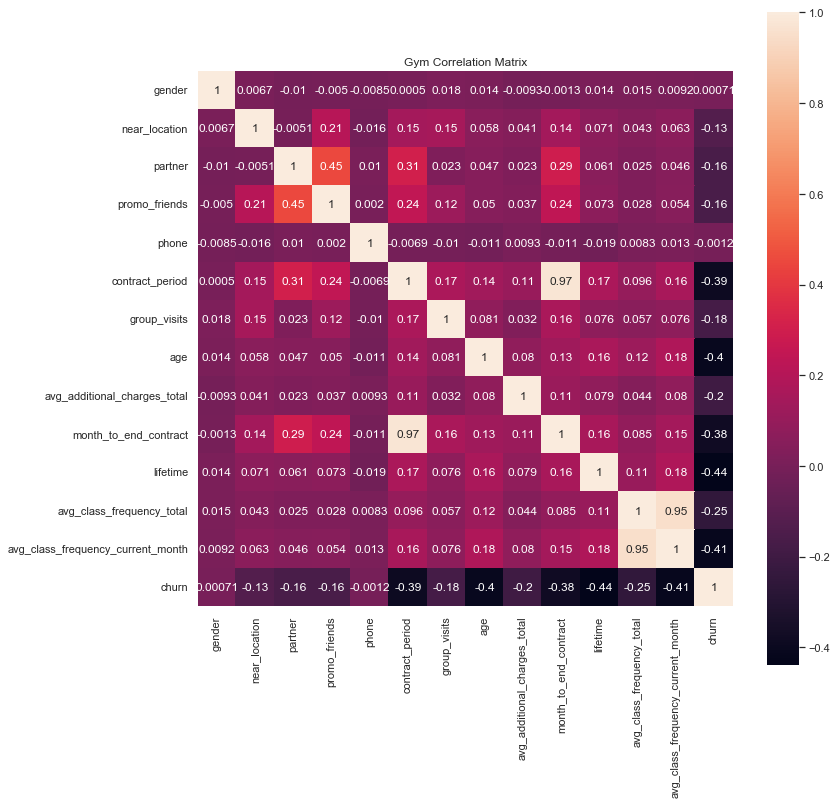

In [29]:
gym_corr =  gym.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(gym_corr, annot = True, square=True).set_title('Gym Correlation Matrix');

#### We can see that 'churn' is not correlated directly to any of the features but is mostly inversely correlated to most. 
#### We have 3 significant pairs : 
####      1 . av_calls_ferquency_current_month and avg_class_frequency_total,  2 .contract_period and month_to_end_contract ,3. promo_friends and partner

<a id="model"></a>

# 4.Build a model to predict user churn

Build a binary classification model for customers where the <b>target feature is the user's leaving next month</b>.
- Divide the data into train and validation sets using the train_test_split() function.
- Train the model on the train set with two methods:
  - logistic regression
  - random forest
- Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?
Remember to indicate the random_state parameter when dividing data and defining the algorithm.

In [30]:
# set fetures and target column
X = gym.drop('churn',axis=1)
y = gym['churn']

# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<a id="lg_regression"></a>

In [31]:
#logistic regression
regresion_model = LogisticRegression(random_state=0)

#train the model
regresion_model.fit(X_train,y_train)

#use the trained model to make predictions
regresion_pred = regresion_model.predict(X_test)
probabilities = regresion_model.predict_proba(X_test)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

<a id="rf"></a>

In [32]:
#random forest
rf_model = RandomForestClassifier(n_estimators = 100,random_state=0) 

#train the model
rf_model.fit(X_train, y_train)

# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    #print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    #print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

<a id="metrics"></a>

### Metrics Evaluation 

In [34]:
print_all_metrics(y_test, regresion_pred, probabilities, title = 'Metrics for logistic regression:')

Metrics for logistic regression:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83


In [35]:
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')

Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


#### Logistic Rgression is more favorable by all metrics

- Lets take a look into the test set and see their probabilities - according to random forest 
- We can get a look at the features and their weghts too to get an idea which features influence the most

In [36]:
#feature_weights =pd.DataFrame(rf_model.coef_) 
#weight_0 = regresion_model.intercept_
importances = rf_model.feature_importances_
#feature_weights.T.shape
X.columns.shape
main_features

(13,)

['age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month']

In [37]:
df = pd.DataFrame([X.columns,importances]).T
df.columns= ['feature','weight']
df =df.sort_values('weight',ascending=False)
df

,feature,weight
10,lifetime,0.276499
12,avg_class_frequency_current_month,0.18017
11,avg_class_frequency_total,0.129883
7,age,0.119129
8,avg_additional_charges_total,0.0914729
9,month_to_end_contract,0.068855
5,contract_period,0.0659637
6,group_visits,0.0156516
0,gender,0.0124253
2,partner,0.0122845


In [38]:
f_list = df.feature.head(6).values
print(f_list)

['lifetime' 'avg_class_frequency_current_month'
 'avg_class_frequency_total' 'age' 'avg_additional_charges_total'
 'month_to_end_contract']


**We can use these features to help us analyze the k-means clustering**

<a id="clusters"></a>

# 5. Create user clusters
### Set aside the column with data on churn and identify object (user) clusters

* Standarize the data
* Build a matrix of distances
* Plot a dendrogram
* Train the clustering model with the K-means algorithm


## Standardize the data

In [39]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

<a id="dendogram"></a>

### Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram.

In [40]:
linked = linkage(x_sc, method = 'ward')

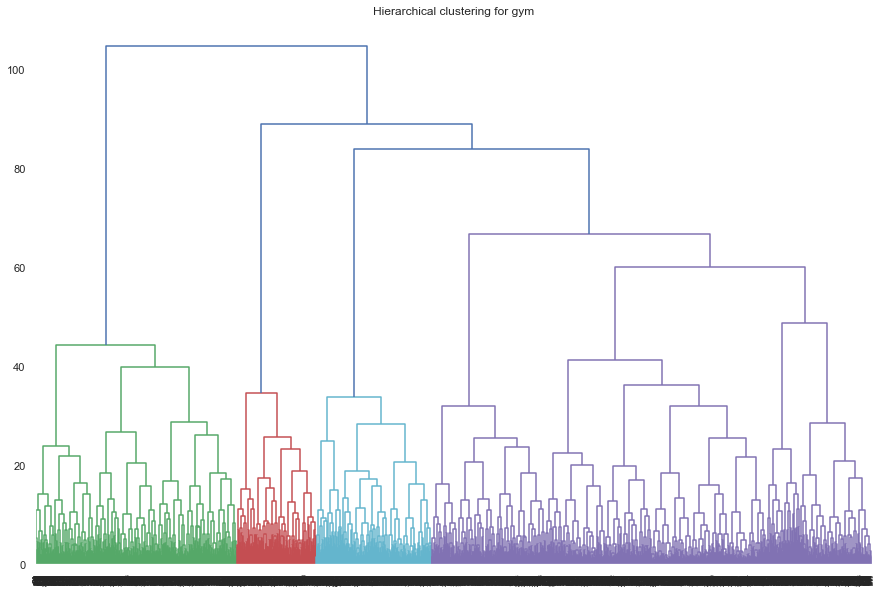

In [41]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for gym')
plt.show();

<a id="k_means"></a>

### K-Means Analysis
#### Train the clustering model with the K-means algorithm and predict customer clusters.(k=5)

In [42]:
#k=5
km = KMeans(n_clusters = 5)

In [43]:
labels = km.fit_predict(x_sc)

In [44]:
lbl_df = pd.DataFrame(labels)


In [45]:
lbl_df.value_counts()

1    1238
3    1021
2     848
4     507
0     386
dtype: int64

### Look at the mean feature values for clusters

In [46]:
gym_km = X
gym_km['km_labels'] =  labels
gym_km['churn'] = gym['churn']

In [47]:
gym_km2 = gym_km.groupby('km_labels').mean().reset_index()
gym_km2

,km_labels,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,1,0.483845,1.000000,0.355412,0.242326,1.0,1.962843,0.340065,28.144588,130.918569,1.872375,2.390953,1.233389,0.995856,0.519386
2,2,0.564858,0.977594,0.343160,0.221698,1.0,2.550708,0.472877,30.122642,161.268043,2.349057,4.916274,2.812928,2.807517,0.074292
3,3,0.498531,0.960823,0.783546,0.575906,1.0,10.854065,0.539667,29.972576,161.128963,9.920666,4.723800,2.003225,1.996705,0.027424
4,4,0.497041,0.000000,0.461538,0.078895,1.0,2.378698,0.218935,28.479290,135.631940,2.224852,2.812623,1.662253,1.480228,0.441815


In [48]:
silhouette_score(x_sc, labels)

0.14068711870860254

**Our silhouette_score is not very good but at least is not negative**

### Plot distributions of features for the clusters

* Here we'll use seaborn pairplot to have a general view of the features which give us the most insight, they will be stored in a list

In [49]:
feautures_list = ['km_labels','age','avg_additional_charges_total','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']

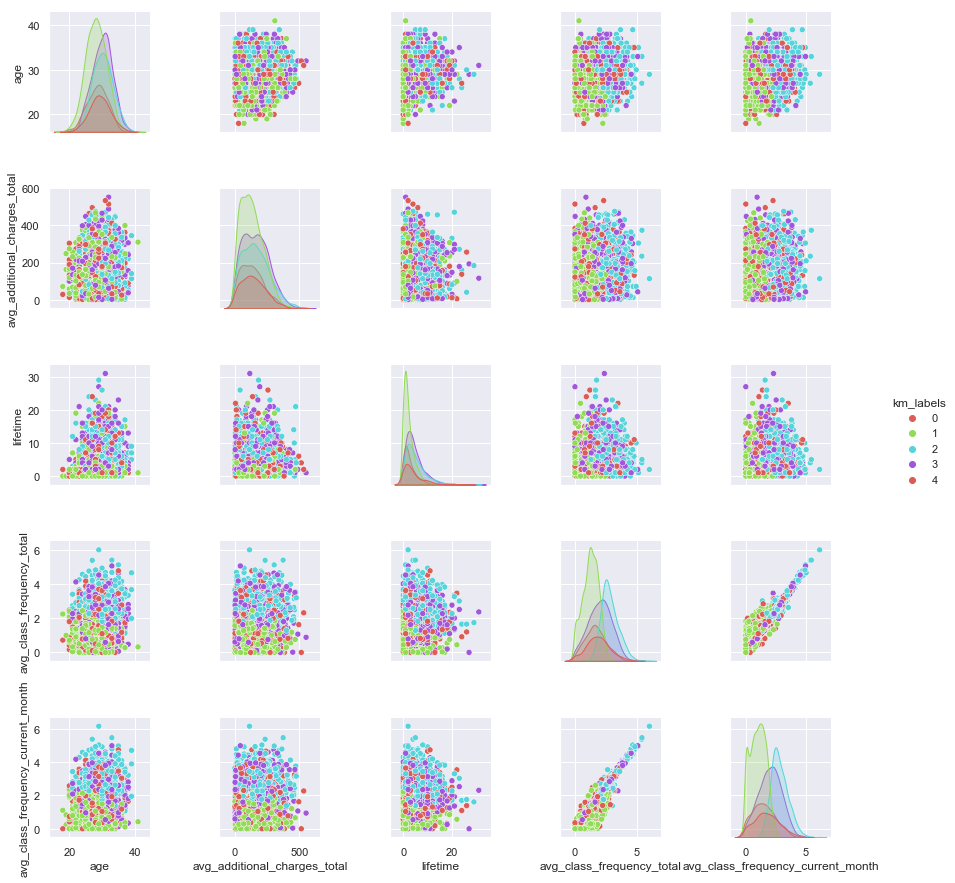

In [50]:
sns.pairplot(gym_km[feautures_list], hue='km_labels',palette='hls');

### Calculate the churn rate for each cluster

In [51]:
churn_rate_per_cluster = pd.DataFrame(gym_km2['churn'].sort_values(ascending=False).reset_index())
churn_rate_per_cluster.columns= ['cluster','churn_rate']
churn_rate_per_cluster

,cluster,churn_rate
0,1,0.519386
1,4,0.441815
2,0,0.266839
3,2,0.074292
4,3,0.027424


* Clusters 2 and 4 are the most likely to churn, while 0,1,3 are much less likely to leave the gym

**Now lets compare 2 pairs just to make sure the churn rate makes sense**

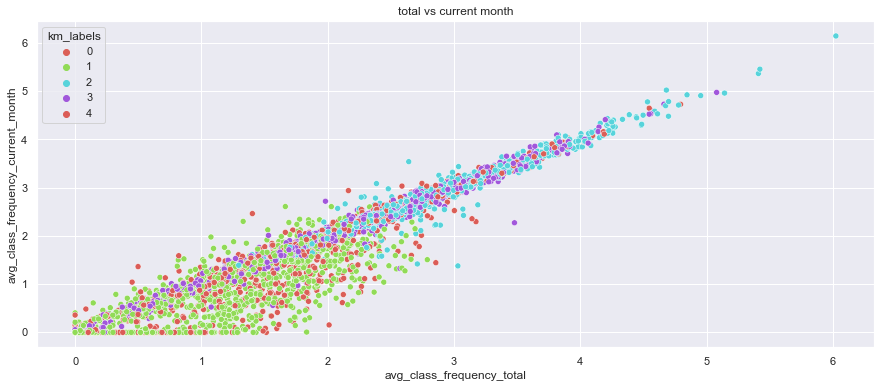

In [52]:
sns.scatterplot(data=gym_km,
                x='avg_class_frequency_total',
                y='avg_class_frequency_current_month',
                hue='km_labels',palette='hls').set_title('total vs current month');

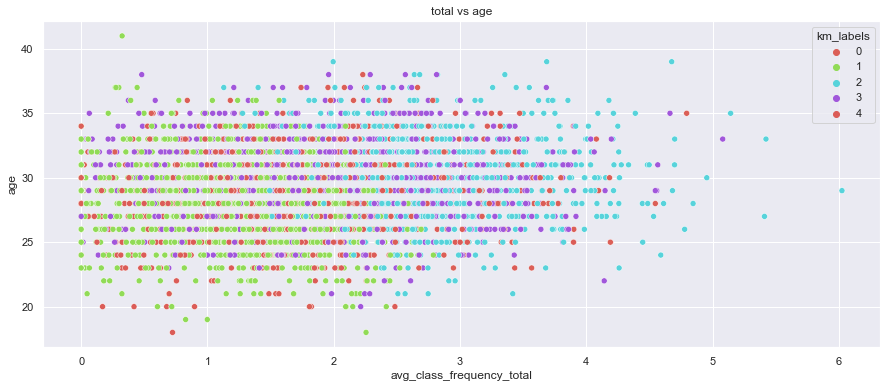

In [53]:
sns.scatterplot(data=gym_km,
                y='age',
                x='avg_class_frequency_total',                
                hue='km_labels',palette='hls').set_title('total vs age');

**In both graphs its hard to see a clear clusterification but one pattern that stands out is group 1 or the light green cluster, it would make sense that the more classes a client attends the less likely she or he will churn and group 1 is one of the groups with a low churn rate, therefore the rates makes sense**

<a id="conclusions"></a>

# 6. Conclusions and Recommendations on working with customers

In [54]:
print('Most Influencial Features of clients who might Churn:\n')
for l in f_list:
    print(l,end='\n')

Most Influencial Features of clients who might Churn:

lifetime
avg_class_frequency_current_month
avg_class_frequency_total
age
avg_additional_charges_total
month_to_end_contract


* The list above tell us the the feautures with the most weight on telling who's about to churn. 
* From the 'total vs current month' graph we see how cluster \#2(the one most likely to churn) is aligned with common sense, which would tell us that someone that attends 2 or less classes in the last month is someone who is not motivated to keep coming back and might churn next month
* The one Feature that might help the Gym the most is Month to End Contract,if we correlate it with 'Contract Period' we see that most clients that churn have a contract for 1 month, the interpretation can be that a client just wants to try the place or just wants to ease his 'fitness' voice therefore they commit at least in paper for one month and try it once before just letting the subscibtion end. 
The one month subscription caters for the 'not so sure / not ready to commit' mentality, one recomendation would be to lenghten that tier from 1 month to 2 months. The point is to cater to more decicive clientele who are at least more comited to their fitness.
* Seeing that those who did not churned are more likely to be an employee of a partner company maybe the Gym can askew this by offering private individuals a promotion like the first month off but subscribed to the second month, that way they are incentivized to visit the gym more while letting them feel an advantage over other clients.
* If we the gym wants to predict who might churn I would recommend using Logistic Regression, although Random Forests also help us clarify the main features of the data set. And manly focus on the Supervise Learning algorithms since K-means did not produce clear insights 


